In [1]:
# Load Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# this import allows you train and test you test split
from sklearn.model_selection import train_test_split
# this import allows you to standardize your data, scaling so that all features have a mean of zero and a standard deviation of 1. 
from sklearn.preprocessing import StandardScaler, QuantileTransformer
# this import allows you to create a logistic regression model; type of machine learning model that can be used for classification tasks 
from sklearn.linear_model import LogisticRegression
# this import allows you to create a support vector machine SVM model, a type of ML model that can be used for classification tasks. 
from sklearn.svm import SVC
# this import allows you to perform CV on your model, a technique for evaluating the performance of a ML on unseen data
from sklearn.model_selection import cross_val_score
# these imports allow you to calculate various evaluation metrics for your ML model. Eval metrics are used to asses the performance of a ML on held-out test set. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# for testing differences with 95% confidence
from scipy.stats import ttest_rel
# for RandomForest models
from sklearn.ensemble import RandomForestClassifier
# for KNN models
from sklearn.neighbors import KNeighborsClassifier
# # for dimensionality reduction using PCA
# from sklearn.decomposition import PCA
# for feature selection
from sklearn.feature_selection import SelectKBest, f_classif


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# file path
file_path = "../1 - Visualization and Data Preprocessing/Data/ONPClean2.csv" # previously cleaned
# file_path = '../1 - Visualization and Data Preprocessing/Data/OnlineNewsPopularity.csv' # unclean

# Load the dataset
df = pd.read_csv(file_path)

# Set the maximum number of columns to display to None
pd.set_option('display.max_columns', None)
df.head()
# print(df.head())
# print(df.columns)

,url_name,date,timedelta,n_tokens_title,n_unique_tokens,average_token_length,num_keywords,kw_min_min,kw_avg_min,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day_of_week,news_category,year,month,log_shares,log_n_tokens_content,log_num_hrefs,log_num_self_hrefs,log_num_imgs,log_num_videos,log_kw_max_min,log_kw_min_max,log_kw_avg_avg,log_self_reference_min_shares,log_self_reference_max_shares,log_self_reference_avg_sharess
0,amazon-instant-video-browser/,2013-01-07,731.0,12.0,0.663594,4.680365,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.6,-0.200,0.500000,-0.1875,0.000000,0.1875,593,Monday,Entertainment,2013,1,6.386879,5.393628,1.609438,1.098612,0.693147,0.0,0.0,0.0,0.0,6.208590,6.208590,6.208590
1,reeddit-reddit/,2013-01-07,731.0,8.0,0.821705,4.546154,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022265,0.022446,0.022276,0.251465,0.681548,0.381987,0.152189,0.038462,0.007692,0.833333,0.166667,0.353939,0.033333,0.7,-0.400000,-0.4,-0.400,0.250000,0.2000,0.250000,0.2000,1300,Monday,Tech,2013,1,7.170888,4.875197,2.079442,1.609438,0.000000,0.0,0.0,0.0,0.0,7.170888,7.170888,7.170888
2,rage-comics-dying/,2013-01-07,731.0,9.0,0.608602,4.759494,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028575,0.199626,0.028615,0.714611,0.028572,0.542580,0.122370,0.063291,0.025316,0.714286,0.285714,0.357269,0.050000,0.6,-0.338889,-1.0,-0.050,0.650000,-0.5000,0.150000,0.5000,1100,Monday,Uncategorized,2013,1,7.003974,6.163315,2.484907,0.000000,0.693147,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,power-matters-alliance-organization/,2013-01-07,731.0,10.0,0.535390,5.147748,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020011,0.020317,0.117255,0.020007,0.822410,0.425089,0.128515,0.039640,0.012613,0.758621,0.241379,0.337965,0.050000,0.7,-0.225794,-0.4,-0.125,0.500000,-0.1000,0.000000,0.1000,1600,Monday,Tech,2013,1,7.378384,6.320768,2.079442,1.945910,0.693147,0.0,0.0,0.0,0.0,7.550135,7.550135,7.550135
4,polaroid-android-camera/,2013-01-07,731.0,9.0,0.424132,4.631390,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025001,0.327017,0.025001,0.025001,0.597981,0.506520,0.279769,0.071749,0.013453,0.842105,0.157895,0.417055,0.100000,1.0,-0.212354,-0.5,-0.050,0.333333,0.2500,0.166667,0.2500,2400,Monday,Tech,2013,1,7.783641,7.017506,3.091042,3.091042,3.044522,0.0,0.0,0.0,0.0,6.302619,9.680406,8.140199


# Data Preparation Part 1 [10 points]

## Define and prepare your class variables.***

### Use proper variable representations (int, float, one-hot, etc.).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url_name                        39644 non-null  object 
 1   date                            39644 non-null  object 
 2   timedelta                       39644 non-null  float64
 3   n_tokens_title                  39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   average_token_length            39644 non-null  float64
 6   num_keywords                    39644 non-null  float64
 7   kw_min_min                      39644 non-null  float64
 8   kw_avg_min                      39644 non-null  float64
 9   kw_max_max                      39644 non-null  float64
 10  kw_avg_max                      39644 non-null  float64
 11  kw_min_avg                      39644 non-null  float64
 12  kw_max_avg                      

##### Original (before any cleaning):
url:        
    Containes the url of the article with the date      
    Object

timedelta:               
    Days between the article publication and the dataset acquisition (non-predictive)               
    float64

n_tokens_title:               
    Number of words in the title               
    float64

n_tokens_content:               
    Number of words in the content               
    float64

n_unique_tokens:               
    Rate of unique words in the content               
    float64

n_non_stop_words:           
    Rate of non-stop words in the content           
    float64

n_non_stop_unique_tokens:      
    Rate of unique non-stop words in the content      
    float64

num_hrefs:                    
    Number of links                 
    float64

num_self_hrefs:               
    Number of links to other articles published by Mashable            
    float64

num_imgs:                      
    Number of images        
    float64

num_videos:                    
    Number of videos            
    float64
    
average_token_length:               
    Average length of the words in the content               
    Float64

num_keywords:               
    Number of keywords in the metadata               
    float64

data_channel_is_lifestyle:     
    Is data channel 'Lifestyle'?            
    Binary (Yes = 1 / No = 0)       
    float64

data_channel_is_entertainment:          
    Is data channel 'Entertainment'?            
    Binary (Yes = 1 / No = 0)       
    float64

data_channel_is_bus:           
    Is data channel 'Business'?         
    Binary (Yes = 1 / No = 0)       
    float64
  
data_channel_is_socmed:        
    Is data channel 'Social Media'?             
    Binary (Yes = 1 / No = 0)       
    float64
   
data_channel_is_tech:          
    Is data channel 'Tech'?             
    Binary (Yes = 1 / No = 0)       
    float64
 
data_channel_is_world:         
    Is data channel 'World'?        
    Binary (Yes = 1 / No = 0)       
    float64
 
kw_min_min:               
    Worst keyword (min. shares)               
    float64

kw_max_min:                    
    Worst keyword (max. shares)         
    float64

kw_avg_min:                    
    Worst keyword (avg. shares)               
    float64

kw_min_max:                    
    Best keyword (min. shares)          
    float64

kw_max_max:                    
    Best keyword (max. shares)               
    float64

kw_avg_max:                    
    Best keyword (avg. shares)               
    float64

kw_min_avg:                    
    Avg. keyword (min. shares)               
    float64

kw_max_avg:                    
    Avg. keyword (max. shares)               
    float64

kw_avg_avg:                    
    Avg. keyword (avg. shares)          
    float64

self_reference_min_shares:    
    Min. shares of referenced articles in Mashable          
    float64

self_reference_max_shares:     
    Max. shares of referenced articles in Mashable          
    float64

self_reference_avg_sharess:   
    Avg. shares of referenced articles in Mashable          
    float64

weekday_is_monday:             
    Was the article published on a Monday?          
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_tuesday:            
    Was the article published on a Tuesday?             
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_wednesday:          
    Was the article published on a Wednesday?               
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_thursday:           
    Was the article published on a Thursday?            
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_friday:             
    Was the article published on a Friday?          
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_saturday:           
    Was the article published on a Saturday?            
    Binary (Yes = 1 / No = 0)       
    float64

weekday_is_sunday:              
    Was the article published on a Sunday?          
    Binary (Yes = 1 / No = 0)       
    float64

is_weekend:                    
    Was the article published on the weekend?               
    Binary (Yes = 1 / No = 0)       
    float64

LDA_00:                        
    LDA topic modeling 
    Closeness to LDA topic 0               
    float64

LDA_01:                       
    Closeness to LDA topic 1               
    float64

LDA_02:                        
    Closeness to LDA topic 2               
    float64

LDA_03:                       
    Closeness to LDA topic 3               
    float64

LDA_04:                        
    Closeness to LDA topic 4               
    float64

global_subjectivity:           
    Text subjectivity               
    float64

global_sentiment_polarity:     
    Text sentiment polarity               
    float64

global_rate_positive_words:    
    Rate of positive words in the content               
    float64

global_rate_negative_words:    
    Rate of negative words in the content               
    float64

rate_positive_words:           
    Rate of positive words among non-neutral tokens               
    float64

rate_negative_words:           
    Rate of negative words among non-neutral tokens               
    float64

avg_positive_polarity:         
    Avg. polarity of positive words               
    float64

min_positive_polarity:         
    Min. polarity of positive words               
    float64

max_positive_polarity:         
    Max. polarity of positive words               
    float64

avg_negative_polarity:         
    Avg. polarity of negative  words               
    float64

min_negative_polarity:         
    Min. polarity of negative  words               
    float64

max_negative_polarity:         
    Max. polarity of negative  words               
    float64

title_subjectivity:            
    Title subjectivity               
    float64

title_sentiment_polarity:      
    Title polarity               
    float64

abs_title_subjectivity:        
    Absolute subjectivity level               
    float64

abs_title_sentiment_polarity:  
    Absolute polarity level               
    float64

shares:                        
    Number of shares (target)               
    Integer

##### Newly Created (from after preeviously done cleaning & any transformations):
url_name:               
    URL of the article (non-predictive)               
    Float

Date:               
    The date the article was published               
    DateTime

Day_of_week:               
    What day of the week the article is posted on               
    Categorical

news_category:               
    What news category the article is               
    Categorical

Year:               
    The year the article was published               
    Integer

Month:               
    The month the aticle was published               
    Integer

log_shares:               
    log of the "shares" variable               
    Float

log_n_tokens_content:               
    log of the "n_tokens_content" variable               
    Float

log_num_hrefs:               
    log of the "num_hrefs" variable               
    Float

log_num_self_hrefs:               
    log of the "num_self_hrefs" variable               
    Float

log_num_imgs:               
    log of the "num_imgs" variable               
    Float

log_num_videos:               
    log of the "num_videos" variable               
    Float

log_kw_max_min:               
    log of the "kw_max_min" variable               
    Float

log_kw_min_max:               
    log of the "kw_min_max" variable               
    Float

log_kw_avg_avg:               
    log of the "kw_avg_avg" variable               
    Float

log_self_reference_min_shares:               
    log of the "self_reference_min_shares" variable               
    Float

log_self_reference_max_shares:               
    log of the "self_reference_max_shares" variable               
    Float

log_self_reference_avg_shares:               
    log of the "self_reference_avg_shares" variable               
    Float

day_of_weekX where X is the day of the week
    a binary value meaning either Yes (1) it is day X or No (0) it is not day x
     

### Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc.

If your dataset has outliers, you may want to remove them before training your model, as outliers can skew the results of the model.

If your dataset has categorical variables, you need to encode them before training your model, as most machine learning algorithms can only handle numerical features.

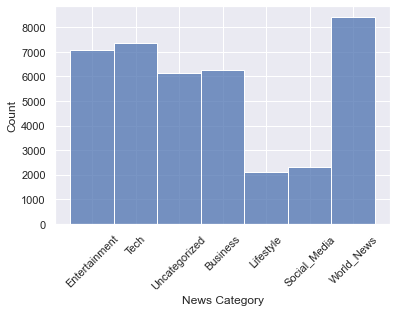

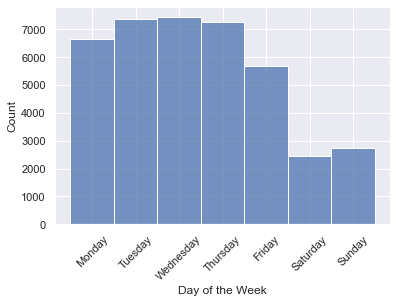

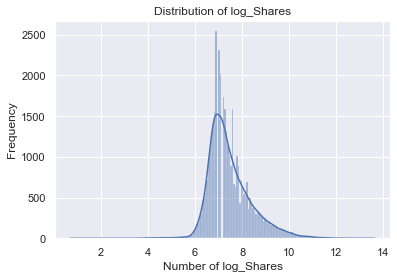

In [4]:
# Histogram of Existing Categorical Variables before encoding 

# We will need to one hot encode 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.histplot(data=df, x="news_category", discrete=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.xlabel("News Category")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
sns.histplot(data=df, x="day_of_week", discrete=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.xlabel("Day of the Week")
plt.show()

# shares is another variable that is interesting - it is currenlty an integer
# for scaling purpose, lets look at shares in log format to understand the distribution 
# in data - we'll use shares as a response variable and and make use of Quantile transformer 

sns.histplot(data=df, x='log_shares', kde=True)  # kde=True adds a Kernel Density Estimation plot
plt.title('Distribution of log_Shares')  # Add a title to the plot if needed
plt.xlabel('Number of log_Shares')  # Customize the x-axis label if needed
plt.ylabel('Frequency')  # Customize the y-axis label if needed

plt.show()

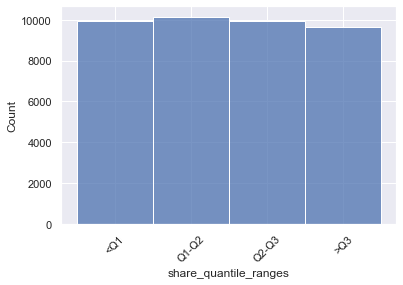

In [5]:
# Here we have taken shares and tranformed it quantile ranges to use a categorical variable

# Create bins using quantiles
q1 = df['shares'].quantile(0.25)
q2 = df['shares'].quantile(0.5)
q3 = df['shares'].quantile(0.75)

# Define the bin labels
labels = ['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3']

# Cut the shares column into bins
df['share_quantile_ranges'] = pd.cut(df['shares'], bins=[0, q1, q2, q3, 1000000], labels=labels)

sns.set(style="darkgrid")
sns.histplot(data=df, x="share_quantile_ranges", discrete=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.xlabel("share_quantile_ranges")
plt.show()


In [7]:
# Remove certain columns before dimensionality reduction can take place

# drop certain columns
df1 = df.drop('url_name', axis=1) # was a string
df1 = df1.drop('date', axis=1) # datetime change didn't work.
# df1 = df1.drop('log_shares', axis=1) # not useful

df1['news_category'] = df1['news_category'].astype('category')
df1['news_category'].dtypes

df1['day_of_week'] = df1['day_of_week'].astype('category')
df1['day_of_week'].dtypes


df1 = pd.get_dummies(df1, columns=['news_category'], prefix='category')
df1 = pd.get_dummies(df1, columns=['day_of_week'], prefix='day')


print(df1.columns)

# # drop Na's
df1.dropna(inplace=True)
print(df1.dtypes.to_string())



Index(['timedelta', 'n_tokens_title', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'kw_min_min', 'kw_avg_min',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'shares', 'year', 'month', 'log_shares',
       'log_n_tokens_content', 'log_num_hrefs', 'log_num_self_hrefs',
       'log_num_imgs', 'log_num_videos', 'log_kw_max_min', 'log_kw_min_max',
       'log_kw_avg_avg', 'log_self_reference_min_shares',
       'log_self_refere

In [ ]:

# Create share_quantile_ranges_variable for target

#skipping this and 
# Create bins using quantiles
# q1 = df1['shares'].quantile(0.25)
# q2 = df1['shares'].quantile(0.5)
# q3 = df1['shares'].quantile(0.75)

# # Define the bin labels
# labels = ['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3']

# # Cut the shares column into bins
# df1['share_quantile_ranges'] = pd.cut(df1['shares'], bins=[0, q1, q2, q3, 1000000], labels=labels)

In [ ]:
# Remove target
# X = df.drop(['share_ranges'], axis=1)
# y = df['share_ranges']
# print(X.columns)
# print(y)

# Training Test 80/20 Split
# random_state = 42

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)


Dimensionality Reduction

In [8]:
print(len(df1.columns))

63


8


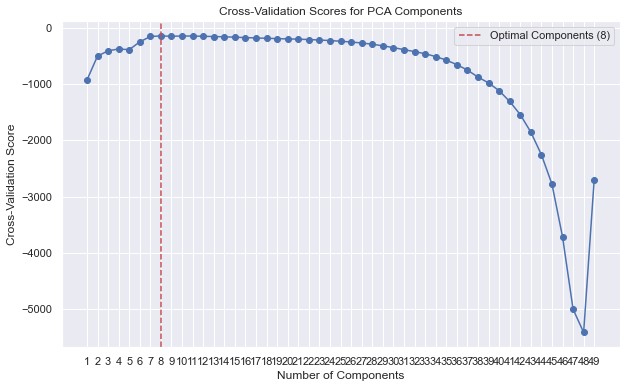

In [9]:
# DataFrame 1 
# Picking the right PCA n_components in this case 5 for DataFrame 1 

X1 = df1.drop(['share_quantile_ranges', 'shares', 'log_shares'], axis=1) 
# print(len(X1.columns))
y1 = df1['share_quantile_ranges']



# Define a range of values for n_components
n_components_range = range(1, 50)

# Perform cross-validation to evaluate each value of n_components
cross_val_scores = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    scores = cross_val_score(pca, X1, cv=10)
    cross_val_scores.append(scores.mean())


# Plot the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, cross_val_scores, marker='o')
plt.title('Cross-Validation Scores for PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validation Score')
plt.xticks(n_components_range)
plt.grid(True)



# Choose the value of n_components that maximizes the cross-validation score
best_n_components = n_components_range[np.argmax(cross_val_scores)]
print(best_n_components)

# Add a marker at the optimal number of components (best_n_components)
plt.axvline(x=best_n_components, color='r', linestyle='--', label='Optimal Components (8)')

plt.legend()
plt.show()

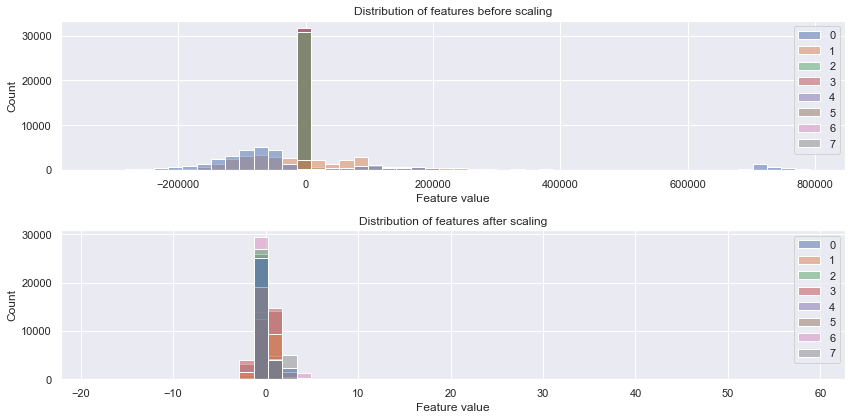

In [12]:
# DataFrame 1

# dimensiontality reduction using PCA 
# PCA (Principal Component Analysis):

# Imagine you have a lot of data with many features (like different attributes of a car - weight, engine size, fuel efficiency, etc.). PCA helps you find a new way to look at the data.
# It finds the most important things your data can tell you and organizes them in order of importance, like sorting your toy collection from most favorite to least favorite.
# Why we do it: It simplifies complex data, helps identify patterns, and makes it easier to understand and work with.
# Scaling using Standard Scaler 
# Standard Scaler (Standardization):

# Think of different measurements like inches and centimeters. If you mix them, it's confusing. Standard Scaler makes sure all your measurements are on the same scale.
# It changes the values so they have a mean (average) of 0 and a standard deviation (a measure of how spread out the values are) of 1. It's like changing all your temperatures from Fahrenheit to Celsius.
# Why we do it: It makes data comparable, helps some algorithms work better, and prevents one feature from dominating the others just because it has larger values.
# Additional scaling using QuantileTransformer

# # we need to try this without Quantile Transformer 
# Quantile Transformer:

# Imagine you have a bag of marbles, and you want to group them by size. Quantile Transformer helps you sort the marbles into groups with equal numbers in each group.
# It turns your data into a specific shape where each part has the same amount of data points. This can help when you want to make your data follow a specific pattern.
# Why we do it: It can help when your data is not normally distributed (like a bell curve) and you want it to look more predictable or easier to work with


import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=8)  # Specify the number of components you want
X1_reduced = pca.fit_transform(X1)

# Splitting the Data for share_quantile_ranges task 
random_state = 42

# Split the PCA reduced data into training and test sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1_reduced, y1, test_size=0.2, random_state=42)


# Scale the features in the training and testing sets using StandardScalar.
scaler = StandardScaler()

# Use previous train/test split

# for share_quantile_range_task
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)


# quantile transfomer causing issues with model data --- lets just do standard scaler
# # Quantile transfomer on response variable 
# from sklearn.preprocessing import QuantileTransformer

# # Create a QuantileTransformer object
# quantile_transformer = QuantileTransformer()
# Fit the quantile transformer to the training data
# X_train1_qt = quantile_transformer.fit(X_train1_scaled)
# X_test1_qt = quantile_transformer.transform(X_test1_scaled)

# Transform the training and test data using the fitted quantile transformer
# y_train1_scaled = quantile_transformer.transform(X_train1)
# y_test1_scaled = quantile_transformer.transform(X_test1)

# Plot two histograms one for the distribution of the features before scaling and one for the distribution of features after scaling - here we can see how the scaling has affected the distribution using the minimium number of components being 5 


plt.figure(figsize=(12, 6))

# Before scaling
plt.subplot(211)
sns.histplot(data=X_train1, bins=50)
# sns.histplot(data=X_train1, bins=50, kde=True)
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.title('Distribution of features before scaling')

# After scaling
plt.subplot(212)
sns.histplot(data=X_train1_scaled, bins=50)
# sns.histplot(data=X_train1_scaled, bins=50, kde=True)
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.title('Distribution of features after scaling')


plt.tight_layout()
plt.show()


In [13]:
# model - share_quantile_range



from sklearn.model_selection import GridSearchCV

# Create the random forest model
# rf = RandomForestClassifier(n_estimators=100)
rf = RandomForestClassifier()

# Define a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Vary the number of estimators
    'max_depth': [None, 10, 20, 30],  # Vary the maximum depth of trees
}

# param_grid = {
#     'n_estimators': [100, 200, 300],  # Vary the number of estimators
#     'max_depth': [None, 10, 20, 30],  # Vary the maximum depth of trees
#     'min_samples_split': [2, 5, 10],  # Vary the minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Vary the minimum number of samples required at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],  # Vary the number of features to consider
#     'bootstrap': [True, False],  # Vary whether or not to use bootstrapping
#     'criterion': ['gini', 'entropy'],  # Vary the split criterion
#     'max_leaf_nodes': [None, 10, 20, 30],  # Vary the maximum number of leaf nodes
#     'min_impurity_decrease': [0.0, 0.1, 0.2],  # Vary the minimum impurity decrease
# }


# Create a grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the share_quantile_ranges model with the best hyperparameters
grid_search.fit(X_train1_scaled, y_train1)

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Make predictions on the test set for share_quantile_ranges task
rf_y_pred1 = best_rf.predict(X_test1_scaled)

# Train the share_quantile_ranges model
# rf.fit(X_train1_scaled, y_train1)


# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
rf_accuracy1 = accuracy_score(y_test1, rf_y_pred1)
rf_precision1 = precision_score(y_test1, rf_y_pred1, average='macro')
rf_recall1 = recall_score(y_test1, rf_y_pred1, average='macro')
rf_f1_score1 = f1_score(y_test1, rf_y_pred1, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores1 = np.array([rf_accuracy1, rf_precision1, rf_recall1, rf_f1_score1])

# Print the model evaluation metrics
print('Random Forest on share_quantile_ranges Task')
print(rf_model_scores1)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy1)
print('Random Forest precision:', rf_precision1)
print('Random Forest recall:', rf_recall1)
print('Random Forest F1 score:', rf_f1_score1)

Random Forest on share_quantile_ranges Task
[0.35262959 0.34339154 0.35767748 0.3422122 ]
---------------------------------------------------------
Random Forest accuracy: 0.35262958758986
Random Forest precision: 0.34339154389437254
Random Forest recall: 0.35767747662802485
Random Forest F1 score: 0.3422122040639109


In [14]:
print('Best Hyperparameters:', grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 300}


/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/Users/tmc/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


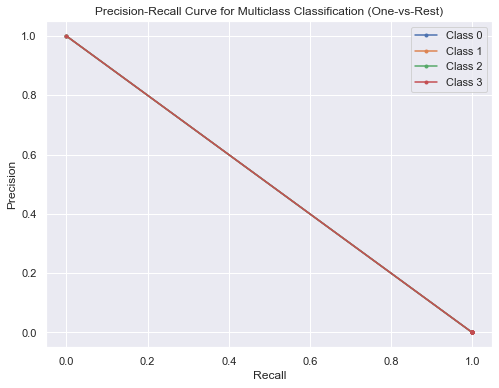

In [22]:

# this does not work yet 


from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_scores is a 2D array where each column corresponds to a different class
# For example, if you have 3 classes, y_scores should have 3 columns.
# Each column represents the predicted probabilities for that class.
precisions = []
recalls = []
thresholds = []

# Calculate Precision and Recall for each class
for class_index in range(y_scores.shape[1]):
    precision, recall, class_thresholds = precision_recall_curve(y_test[:, class_index], y_scores[:, class_index])
    precisions.append(precision)
    recalls.append(recall)
    thresholds.append(class_thresholds)

# Plot the Precision-Recall curves for each class
plt.figure(figsize=(8, 6))
colors = ['magenta', 'blue', 'green']  # You can define colors for each class
for class_index in range(len(precisions)):
    plt.plot(recalls[class_index], precisions[class_index], marker='.', color=colors[class_index], label=f'Class {class_index}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Multi-class)')

# Annotate thresholds on the curves
for class_index in range(len(thresholds)):
    class_thresholds = thresholds[class_index]
    for i in range(0, len(class_thresholds), 25):
        plt.annotate(f"Threshold={class_thresholds[i]:.2f}", (recalls[class_index][i], precisions[class_index][i]), fontsize=9)

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# model 2 KNN on



























In [41]:
# DataFrame 2 
# Picking the right PCA n_components in this case 5 for Dataframe 2 

# Create a dataframe for the current response variable

# Question on which columns should be dropped when are predicting day of the week -- the response here is any is any column like=day -- but i am not sure this is the correct way to run the model-- but maybe it is --- start here before running models, then setting up pipeline followed by grid array
from sklearn.model_selection import cross_val_score

X2 = df1.drop([ 'share_quantile_ranges', 'log_shares', 'day_Friday','day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday'], axis=1)

# X2 = df1.drop([ 'share_quantile_ranges', 'shares', 'log_shares','day_Friday','day_Monday', 'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday'], axis=1)

y2 = df1.filter(like='day_')  # Assuming 'day_' is the prefix for one-hot encoded columns


# Define a range of values for n_components
n_components_range = range(1, 50)

# Perform cross-validation to evaluate each value of n_components
cross_val_scores = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    scores = cross_val_score(pca, X2, cv=10)
    cross_val_scores.append(scores.mean())

# Choose the value of n_components that maximizes the cross-validation score
best_n_components = n_components_range[np.argmax(cross_val_scores)]
print(best_n_components)

9


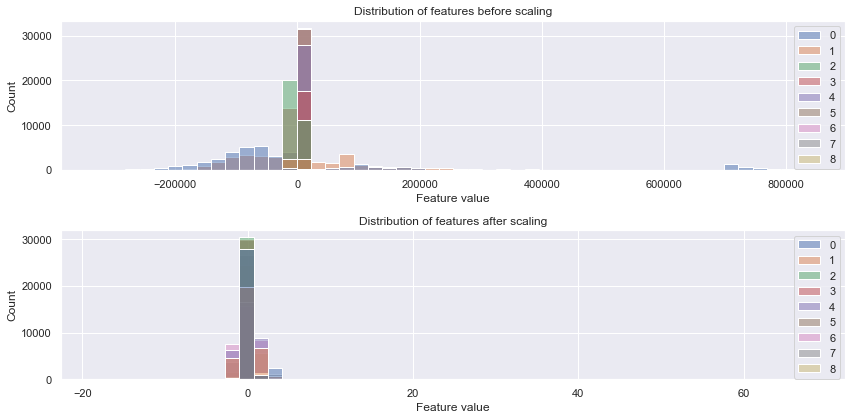

In [43]:
# Dataframe 2 

# dimensiontality reduction using PCA 
# Scaling using Standard Scaler 
# Additional scaling using QuantileTransformer

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


# Perform PCA
pca = PCA(n_components=9)  # Specify the number of components you want
X2_reduced = pca.fit_transform(X2)

# Splitting the Data for share_quantile_ranges task 
random_state = 42


# Split the PCA reduced data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_reduced, y2, test_size=0.2, random_state=42)

# lets scale the data 

scaler = StandardScaler()

# Use previous train/test split

# for share_quantile_range_task
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)



# # Quantile transfomer on response variable 
# from sklearn.preprocessing import QuantileTransformer

# # Create a QuantileTransformer object
# quantile_transformer = QuantileTransformer()

# # Fit the quantile transformer to the training data
# quantile_transformer.fit(X2_train)

# # Transform the training and test data using the fitted quantile transformer
# y_train_scaled = quantile_transformer.transform(X2_train)
# y_test_scaled = quantile_transformer.transform(X2_test)


# Plot two histograms one for the distribution of the features before scaling and one for the distribution of features after scaling - here we can see how the scaling has affected the distribution using the minimium number of components being 5 

plt.figure(figsize=(12, 6))

# Before scaling
plt.subplot(211)
sns.histplot(data=X_train2, bins=50)
# sns.histplot(data=X_train1, bins=50, kde=True)
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.title('Distribution of features before scaling')

# After scaling
plt.subplot(212)
sns.histplot(data=X_train2_scaled, bins=50)
# sns.histplot(data=X_train1_scaled, bins=50, kde=True)
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.title('Distribution of features after scaling')


plt.tight_layout()
plt.show()

In [ ]:
# model 1 






In [ ]:
# Create a dataframe for the current response variable
X3 = df1.drop([ 'share_quantile_ranges','log_shares','category_Business', 'category_Entertainment', 'category_Lifestyle', 'category_Social_Media', 'category_Tech','category_Uncategorized', 'category_World_News'], axis=1)
y3 = df1.filter(like='category_')  # Assuming 'day_' is the prefix for one-hot encoded columns

from sklearn.model_selection import cross_val_score

# Define a range of values for n_components
n_components_range = range(1, 50)

# Perform cross-validation to evaluate each value of n_components
cross_val_scores = []
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    scores = cross_val_score(pca, X2, cv=10)
    cross_val_scores.append(scores.mean())

# Choose the value of n_components that maximizes the cross-validation score
best_n_components = n_components_range[np.argmax(cross_val_scores)]
print(best_n_components)

In [ ]:
# Dataframe 3

# dimensiontality reduction using PCA 
# Scaling using Standard Scaler 
# Additional scaling using QuantileTransformer

from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=8)  # Specify the number of components you want
X3_reduced = pca.fit_transform(X3)

# Splitting the Data for share_quantile_ranges task 
random_state = 42
from sklearn.model_selection import train_test_split

# Split the PCA reduced data into training and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_reduced, y3, test_size=0.2, random_state=42)


# lets scale the data 
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X3_train)

# Transform the training and test data using the fitted scaler
X_train_scaled = scaler.transform(X3_train)
X_test_scaled = scaler.transform(X3_test)


# # Quantile transfomer on response variable 
# from sklearn.preprocessing import QuantileTransformer

# # Create a QuantileTransformer object
# quantile_transformer = QuantileTransformer()

# # Fit the quantile transformer to the training data
# quantile_transformer.fit(X3_train)

# # Transform the training and test data using the fitted quantile transformer
# y_train_scaled = quantile_transformer.transform(X3_train)
# y_test_scaled = quantile_transformer.transform(X3_test)


# Plot two histograms one for the distribution of the features before scaling and one for the distribution of features after scaling - here we can see how the scaling has affected the distribution using the minimium number of components being 5 

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Before scaling
plt.subplot(211)
sns.histplot(data=X3_train, bins=50)
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.title('Distribution of features before scaling')

# After scaling
plt.subplot(212)
sns.histplot(data=X_train_scaled, bins=50)
plt.xlabel('Feature value')
plt.ylabel('Count')
plt.title('Distribution of features after scaling')

plt.tight_layout()
plt.show()


In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

Scaling data

In [ ]:
# Scale the features in the training and testing sets using standard scalar.
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
# Scale the features using QuantileTransformer with n_quantiles=100.
# quantile_transformer = QuantileTransformer(n_quantiles=100)

# X_train_q = quantile_transformer.fit_transform(X_train)
# X_test_q = scaler.transform(X_test)

Scaling is done on the training and testing sets "X_train" and "X_test" in order put the data on a common scale. This will helpful in improving the model performance as they  arre sensitive to the scale of the data. Scaling will be done for each classification task and both types of scaling will be done on the data seperately so that the two methods can be compared later.


### Remove variables that are not needed/useful for the analysis.

Certain variables were deemed unnecessary during lab 1 and were removed during the course of this labs notebook.

These variables were removed:

Url:        
    Dropped as it was better served being split into multiple variables.            
    These varriables did end up not being useful or useable, however.  

n_tokens_content:           
    was removed after being log transformed.            
    This helped with the very skewed data.

n_non_stop_words:              
    Deemed unhelpful

n_non_stop_unique_tokens:           
    Deemed unhelpful

num_hrefs:          
    was removed after being log transformed.            
    This helped with the very skewed data.

num_self_hrefs:         
    was removed after being log transformed.            
    This helped with the very skewed data.
    
num_imgs:           
    was removed after being log transformed.            
    This helped with the very skewed data.

num_videos:         
    was removed after being log transformed.            
    This helped with the very skewed data.

kw_max_min:         
    was removed after being log transformed.            
    This helped with the very skewed data.

kw_min_max:         
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_min_shares:          
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_max_shares:          
    was removed after being log transformed.            
    This helped with the very skewed data.

self_reference_avg_sharess:             
    was removed after being log transformed.            
    This helped with the very skewed data.

weekday_is_X where X is the day of the week:        
    Removed previously.         
    This was to turn it into a categorical variable for the model being run at the time.        
    This variable has been recreated for our current classification problems as shown above with the factoring of day_of_week.      

data_channel_is_X where X is the type of data channel:      
    Removed previously.     
    This was to turn it into a categorical variable for the model being run at the time.        
    This variable has been recreated for our current classification problems as shown above with the factoring of news_category.        

In [ ]:
# from previously cleaned dataset

# drop certain columns
# Done above
# df1 = df.drop('url_name', axis=1) # was a string
# df1 = df1.drop('date', axis=1) # datetime change didn't work.
# df1 = df1.drop('log_shares', axis=1) # not useful

# drop Na's
df1.dropna()

df1.head()

url_name:           
    Dropped due to it being a string variable that wasn't useful

date:
    Dropped due to it being a datetime variable that wasn't useful

log_shares:           
    The share_quantile_ranges was deemed to be more useful.

all Na's were dropped

The shares, day_of_week, and news_category variables will be removed when selecting the target variable further down. Variables related to the current task will also be removed such as 'shares', 'day_of_week_Monday' (for example), and news_category_World (for example). This is to avoid these variables essentially giving the model the right answer

# Data Preperation Part 2 [5 points]

## Describe the final dataset that is used for classification/regression
(include a description of any newly formed variables you created).

### share_quantile_ranges

In [ ]:
#Already done up above BUT we have to paste it here in this section too!!!! 






# # Create bins using quantiles
# q1 = df1['shares'].quantile(0.25)
# q2 = df1['shares'].quantile(0.5)
# q3 = df1['shares'].quantile(0.75)

# # Define the bin labels
# labels = ['<Q1', 'Q1-Q2', 'Q2-Q3', '>Q3']

# # Cut the shares column into bins
# df1['share_quantile_ranges'] = pd.cut(df1['shares'], bins=[0, q1, q2, q3, 1000000], labels=labels)

# # Print the value counts of the share_ranges_quantile column
# print(df1['share_quantile_ranges'].value_counts())

In [ ]:
df1.columns

share_quantile_ranges: This was created by splitting up the shares variable into bins by using its different quantile values. This allowed for a more even split among the groups.

### factoring day_of_week

In [ ]:
#already did this up top 
# Factor the `day_of_week` column.
# df1 = pd.get_dummies(df1, columns=['day_of_week'])

factored day_of_week columns: day_of_week was factored back into 7 columns of 0's and 1's similar to how it was in the original dataset.

### factoring news_category

In [ ]:
# Factor the `news_category` column.
# df1 = pd.get_dummies(df1, columns=['news_category'])

factored news_category columns: day_of_week was factored back into 6 columns of 0's and 1's representative if it is that day or not similar to how it was in the original dataset.

In [ ]:
df1.describe()

# Modeling and Evaluation 1 (10 points total)

## Choose and explain your evaluation metrics that you will use: (i.e., accuracy, precision, recall, F-measure, or any metric we have discussed).

### Why are the measure(s) appropriate for analyzing the results of your modeling?

Accuracy would not be the most appropriate metric to evaluate our logisitic regression model. This is because your dataset is imbalanced, a majority of shares are in the Q1-Q2 range - so a model that simply predicts all share ranges as Q1-Q2 will have a higher accuracy score. 

A more appropriate metric to judge our logistic regression model would be precision and recall. By evaluating the logistic regression model by the proportion of predicted positive examples that are truly positive and the predicted negative examples that are truly negative with F1 score, its a good balanced metric to measure model performance. 

### Give a detailed explanation backing up any assertions.

# Modeling and Evaluation 2 (10 points total)

## Choose the method you will use for dividing your data into training and testing splits

share_quantile_ranges task

In [ ]:
# Remove target, related variables, and other targets



X1 = df1.drop(['share_quantile_ranges', 'shares', 'day_of_week', 'news_category'], axis=1) 
y1 = df1['share_quantile_ranges']
# print(X1.columns)
# print(y1)

# Splitting the Data for share_quantile_ranges task 
random_state = 42

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

day_of_week task

In [ ]:
# Remove target, related variables, and other targets
X2 = df1.drop(['share_quantile_ranges', 'day_of_week', 'news_category', 'day_of_week_Monday', 'day_of_week_Tuesday', 'day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunnday'], axis=1) # Removing target categorical variable and other categorical variables
y2 = df1['day_of_week']
# print(X2.columns)
# print(y2)

# Splitting the Data for day_of_week task
random_state = 42

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=random_state)

news_category task

In [ ]:
# Splitting the Data for news_category task
X3 = df1.drop(['share_quantile_ranges', 'day_of_week', 'news_category', 'news_category_Lifestyle', 'news_category_Entertainment', 'news_category_Business', 'news_category_Social Media', 'news_category_Tech', 'news_category_World'], axis=1) # Removing target categorical variable and other categorical variables
y3 = df1['news_category']
# print(X2.columns)
# print(y2)

random_state = 42

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=random_state)

### (i.e., are you using Stratified 10-fold cross validation? Why?).


### Explain why your chosen method is appropriate or use more than one method as appropriate.
For example, if you are using time series data then you should be using continuous training and testing sets across time.

# Modeling and Evaluation 3 (20 points total)

## Create three different classification/regression models (e.g., random forest,KNN, and SVM).

### Two modeling techniques must be new (but the third could be SVM or logistic regression).

In [ ]:
# Scale the features in the training and testing sets using StandardScalar.
# scaler = StandardScaler()

# # Use previous train/test split

# # for share_quantile_range_task
# X_train1 = scaler.fit_transform(X_train1)
# X_test1 = scaler.transform(X_test1)

# # for day_of_week task
# X_train2 = scaler.fit_transform(X_train2)
# X_test2 = scaler.transform(X_test2)

# # for news_category task
# X_train2 = scaler.fit_transform(X_train3)
# X_test2 = scaler.transform(X_test3)

In [ ]:
# # Scale the features in the training and testing sets using QuantileTransformer.
# quantile_transformer = QuantileTransformer(n_quantiles=100)

# # Use previous train/test split

# # for share_quantile_range_task
# X_train_q1 = quantile_transformer.fit_transform(X_train1)
# X_test_q1 = quantile_transformer.fit_transform(X_test1)

# # for day_of_week task
# X_train_q2 = quantile_transformer.fit_transform(X_train2)
# X_test_q2 = quantile_transformer.fit_transform(X_test2)

# # for news_category task
# X_train_q3 = quantile_transformer.fit_transform(X_train3)
# X_test_q3 = quantile_transformer.fit_transform(X_test3)

#### Random Forest

In [ ]:
# Create the random forest model
rf = RandomForestClassifier(n_estimators=100)

##### share_quantile_ranges task

##### StandardScalar transformed

In [ ]:
# Train the share_quantile_ranges model
rf.fit(X_train1, y_train1)


In [ ]:
# Make predictions on the test set for share_quantile_ranges task
rf_y_pred1 = rf.predict(X_test1)

In [ ]:


# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
rf_accuracy1 = accuracy_score(y_test1, rf_y_pred1)
rf_precision1 = precision_score(y_test1, rf_y_pred1, average='macro')
rf_recall1 = recall_score(y_test1, rf_y_pred1, average='macro')
rf_f1_score1 = f1_score(y_test1, rf_y_pred1, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores1 = np.array([rf_accuracy1, rf_precision1, rf_recall1, rf_f1_score1])

# Print the model evaluation metrics
print('Random Forest on share_quantile_ranges Task')
print(rf_model_scores1)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy1)
print('Random Forest precision:', rf_precision1)
print('Random Forest recall:', rf_recall1)
print('Random Forest F1 score:', rf_f1_score1)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the share_quantile_ranges model
rf.fit(X_train_q1, y_train1)

In [ ]:
# Make predictions on the test set for share_quantile_ranges task
rf_y_pred_q1 = rf.predict(X_test_q1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
rf_accuracy_q1 = accuracy_score(y_test1, rf_y_pred_q1)
rf_precision_q1 = precision_score(y_test1, rf_y_pred_q1, average='macro')
rf_recall_q1 = recall_score(y_test1, rf_y_pred_q1, average='macro')
rf_f1_score_q1 = f1_score(y_test1, rf_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q1 = np.array([rf_accuracy_q1, rf_precision_q1, rf_recall_q1, rf_f1_score_q1])

# Print the model evaluation metrics
print('Random Forest on share_quantile_ranges Task')
print(rf_model_scores_q1)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q1)
print('Random Forest precision:', rf_precision_q1)
print('Random Forest recall:', rf_recall_q1)
print('Random Forest F1 score:', rf_f1_score_q1)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### day_of_week task

##### StandardScalar transformed

In [ ]:
# Train the day_of_week task
rf.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test set for day_of_week task
rf_y_pred2 = rf.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for day_of_week task.
rf_accuracy2 = accuracy_score(y_test2, rf_y_pred2)
rf_precision2 = precision_score(y_test2, rf_y_pred2, average='macro')
rf_recall2 = recall_score(y_test2, rf_y_pred2, average='macro')
rf_f1_score2 = f1_score(y_test2, rf_y_pred2, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores2 = np.array([rf_accuracy2, rf_precision2, rf_recall2, rf_f1_score2])

# Print the model evaluation metrics
print('Random Forest on day_of_week Task')
print(rf_model_scores2)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy2)
print('Random Forest precision:', rf_precision2)
print('Random Forest recall:', rf_recall2)
print('Random Forest F1 score:', rf_f1_score2)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the day_of_week task
rf.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test set for day_of_week task
rf_y_pred_q2 = rf.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for day_of_week task.
rf_accuracy_q2 = accuracy_score(y_test2, rf_y_pred_q2)
rf_precision_q2 = precision_score(y_test2, rf_y_pred_q2, average='macro')
rf_recall_q2 = recall_score(y_test2, rf_y_pred_q2, average='macro')
rf_f1_score_q2 = f1_score(y_test2, rf_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q2 = np.array([rf_accuracy_q2, rf_precision_q2, rf_recall_q2, rf_f1_score_q2])

# Print the model evaluation metrics
print('Random Forest on day_of_week Task')
print(rf_model_scores_q2)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q2)
print('Random Forest precision:', rf_precision_q2)
print('Random Forest recall:', rf_recall_q2)
print('Random Forest F1 score:', rf_f1_score_q2)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### news_category task

##### StandardScalar transformed

In [ ]:
# Train the news_category task
rf.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test set for news_category task
rf_y_pred3 = rf.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for news_category task.
rf_accuracy3 = accuracy_score(y_test3, rf_y_pred3)
rf_precision3 = precision_score(y_test3, rf_y_pred3, average='macro')
rf_recall3 = recall_score(y_test3, rf_y_pred3, average='macro')
rf_f1_score3 = f1_score(y_test3, rf_y_pred3, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores3 = np.array([rf_accuracy3, rf_precision3, rf_recall3, rf_f1_score3])

# Print the model evaluation metrics
print('Random Forest on news_category Task')
print(rf_model_scores3)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy3)
print('Random Forest precision:', rf_precision3)
print('Random Forest recall:', rf_recall3)
print('Random Forest F1 score:', rf_f1_score3)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the news_category task
rf.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test set for news_category task
rf_y_pred_q3 = rf.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for news_category task.
rf_accuracy_q3 = accuracy_score(y_test3, rf_y_pred_q3)
rf_precision_q3 = precision_score(y_test3, rf_y_pred_q3, average='macro')
rf_recall_q3 = recall_score(y_test3, rf_y_pred_q3, average='macro')
rf_f1_score_q3 = f1_score(y_test3, rf_y_pred_q3, average='macro')

# Create an array to store the model evaluation metrics
rf_model_scores_q3 = np.array([rf_accuracy_q3, rf_precision_q3, rf_recall_q3, rf_f1_score_q3])

# Print the model evaluation metrics
print('Random Forest on news_category Task')
print(rf_model_scores_q3)
print('---------------------------------------------------------')
print('Random Forest accuracy:', rf_accuracy_q3)
print('Random Forest precision:', rf_precision_q3)
print('Random Forest recall:', rf_recall_q3)
print('Random Forest F1 score:', rf_f1_score_q3)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

#### KNN

In [ ]:
# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

##### share_quantile_ranges task

##### StandardScalar transformed

In [ ]:

# Train the model for the share_quantile_ranges task.
knn.fit(X_train1, y_train1)

In [ ]:
# Make predictions on the test set for the share_quantile_ranges task.
knn_y_pred1 = knn.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
knn_accuracy1 = accuracy_score(y_test1, knn_y_pred1)
knn_precision1 = precision_score(y_test1, knn_y_pred1, average='macro')
knn_recall1 = recall_score(y_test1, knn_y_pred1, average='macro')
knn_f1_score1 = f1_score(y_test1, knn_y_pred1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
knn_model_scores1 = np.array([knn_accuracy1, knn_precision1, knn_recall1, knn_f1_score1])
print('KNN on share_quantile_ranges Task')
print(knn_model_scores1)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy1)
print('KNN precision:', knn_precision1)
print('KNN recall:', knn_recall1)
print('KNN F1 score:', knn_f1_score1)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the model for the share_quantile_ranges task.
knn.fit(X_train1, y_train1)

In [ ]:
# Make predictions on the test set for the share_quantile_ranges task.
knn_y_pred_q1 = knn.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
knn_accuracy_q1 = accuracy_score(y_test1, knn_y_pred_q1)
knn_precision_q1 = precision_score(y_test1, knn_y_pred_q1, average='macro')
knn_recall_q1 = recall_score(y_test1, knn_y_pred_q1, average='macro')
knn_f1_score_q1 = f1_score(y_test1, knn_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
knn_model_scores_q1 = np.array([knn_accuracy_q1, knn_precision_q1, knn_recall_q1, knn_f1_score_q1])
print('KNN on share_quantile_ranges Task')
print(knn_model_scores_q1)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q1)
print('KNN precision:', knn_precision_q1)
print('KNN recall:', knn_recall_q1)
print('KNN F1 score:', knn_f1_score_q1)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### day_of_week task

##### StandardScalar transformed

In [ ]:
# Train the model for the day_of_week task.
knn.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test set for the day_of_week task.
knn_y_pred2 = knn.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
knn_accuracy2 = accuracy_score(y_test2, knn_y_pred2)
knn_precision2 = precision_score(y_test2, knn_y_pred2, average='macro')
knn_recall2 = recall_score(y_test2, knn_y_pred2, average='macro')
knn_f1_score2 = f1_score(y_test2, knn_y_pred2, average='macro')

# Create an array to store the model evaluation metrics the day_of_week task.
knn_model_scores2 = np.array([knn_accuracy2, knn_precision2, knn_recall2, knn_f1_score2])
print('KNN on day_of_week Task')
print(knn_model_scores2)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy2)
print('KNN precision:', knn_precision2)
print('KNN recall:', knn_recall2)
print('KNN F1 score:', knn_f1_score2)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the model for the day_of_week task.
knn.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test set for the day_of_week task.
knn_y_pred_q2 = knn.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
knn_accuracy_q2 = accuracy_score(y_test2, knn_y_pred_q2)
knn_precision_q2 = precision_score(y_test2, knn_y_pred_q2, average='macro')
knn_recall_q2 = recall_score(y_test2, knn_y_pred_q2, average='macro')
knn_f1_score_q2 = f1_score(y_test2, knn_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics the day_of_week task.
knn_model_scores_q2 = np.array([knn_accuracy_q2, knn_precision_q2, knn_recall_q2, knn_f1_score_q2])
print('KNN on day_of_week Task')
print(knn_model_scores_q2)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q2)
print('KNN precision:', knn_precision_q2)
print('KNN recall:', knn_recall_q2)
print('KNN F1 score:', knn_f1_score_q2)

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### news_category task

##### StandardScalar transformed

In [ ]:
# Train the model for the news_category task.
knn.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test set for the news_category task.
knn_y_pred3 = knn.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
knn_accuracy3 = accuracy_score(y_test3, knn_y_pred3)
knn_precision3 = precision_score(y_test3, knn_y_pred3, average='macro')
knn_recall3 = recall_score(y_test3, knn_y_pred3, average='macro')
knn_f1_score3 = f1_score(y_test3, knn_y_pred3, average='macro')

# Create an array to store the model evaluation metrics for the news_category task.
knn_model_scores3 = np.array([knn_accuracy3, knn_precision3, knn_recall3, knn_f1_score3])
print('KNN on news_category Task')
print(knn_model_scores3)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy3)
print('KNN precision:', knn_precision3)
print('KNN recall:', knn_recall3)
print('KNN F1 score:', knn_f1_score3)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the model for the news_category task.
knn.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test set for the news_category task.
knn_y_pred_q3 = knn.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
knn_accuracy_q3 = accuracy_score(y_test3, knn_y_pred_q3)
knn_precision_q3 = precision_score(y_test3, knn_y_pred_q3, average='macro')
knn_recall_q3 = recall_score(y_test3, knn_y_pred_q3, average='macro')
knn_f1_score_q3 = f1_score(y_test3, knn_y_pred_q3, average='macro')

# Create an array to store the model evaluation metrics for the news_category task.
knn_model_scores_q3 = np.array([knn_accuracy_q3, knn_precision_q3, knn_recall_q3, knn_f1_score_q3])
print('KNN on news_category Task')
print(knn_model_scores_q3)
print('---------------------------------------------------------')
print('KNN accuracy:', knn_accuracy_q3)
print('KNN precision:', knn_precision_q3)
print('KNN recall:', knn_recall_q3)
print('KNN F1 score:', knn_f1_score_q3)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

#### SVM

##### share_quantile_ranges task

In [ ]:
# Set the model parameters
C = 1.0
kernel = 'linear'

# Create the support vector machine model
support_vector_machine_model = SVC(C=C, kernel=kernel)

##### StandardScalar transformed

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the share_quantile_ranges task.
support_vector_machine_model.fit(X_train1, y_train1)

In [ ]:
# Make predictions on the test data for the share_quantile_ranges task.
svm_y_pred1 = support_vector_machine_model.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
svm_accuracy1 = accuracy_score(y_test1, svm_y_pred1)
svm_precision1 = precision_score(y_test1, svm_y_pred1, average='macro')
svm_recall1 = recall_score(y_test1, svm_y_pred1, average='macro')
svm_f1_score1 = f1_score(y_test1, svm_y_pred1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
svm_model_scores1 = np.array([svm_accuracy1, svm_precision1, svm_recall1, svm_f1_score1])
print('SVM on share_quantile_range Task')
print(svm_model_scores1)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy1)
print('Support vector machine precision:', svm_precision1)
print('Support vector machine recall:', svm_recall1)
print('Support vector machine F1 score:', svm_f1_score1)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer transformed

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the share_quantile_ranges task.
support_vector_machine_model.fit(X_train1, y_train1)

In [ ]:
# Make predictions on the test data for the share_quantile_ranges task.
svm_y_pred_q1 = support_vector_machine_model.predict(X_test1)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the share_quantile_ranges task.
svm_accuracy_q1 = accuracy_score(y_test1, svm_y_pred_q1)
svm_precision_q1 = precision_score(y_test1, svm_y_pred_q1, average='macro')
svm_recall_q1 = recall_score(y_test1, svm_y_pred_q1, average='macro')
svm_f1_score_q1 = f1_score(y_test1, svm_y_pred_q1, average='macro')

# Create an array to store the model evaluation metrics for the share_quantile_ranges task.
svm_model_scores_q1 = np.array([svm_accuracy_q1, svm_precision_q1, svm_recall_q1, svm_f1_score_q1])
print('SVM on share_quantile_range Task')
print(svm_model_scores_q1)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy_q1)
print('Support vector machine precision:', svm_precision_q1)
print('Support vector machine recall:', svm_recall_q1)
print('Support vector machine F1 score:', svm_f1_score_q1)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### day_of_week task

##### StandardScalar

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the day_of_week task.
support_vector_machine_model.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test data for the day_of_week task.
svm_y_pred2 = support_vector_machine_model.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
svm_accuracy2 = accuracy_score(y_test2, svm_y_pred2)
svm_precision2 = precision_score(y_test2, svm_y_pred2, average='macro')
svm_recall2 = recall_score(y_test2, svm_y_pred2, average='macro')
svm_f1_score2 = f1_score(y_test2, svm_y_pred2, average='macro')

# Create an array to store the model evaluation metrics for the day_of_week task
svm_model_scores2 = np.array([svm_accuracy2, svm_precision2, svm_recall2, svm_f1_score2])
print('SVM on day_of_week Task')
print(svm_model_scores2)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy2)
print('Support vector machine precision:', svm_precision2)
print('Support vector machine recall:', svm_recall2)
print('Support vector machine F1 score:', svm_f1_score2)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the day_of_week task.
support_vector_machine_model.fit(X_train2, y_train2)

In [ ]:
# Make predictions on the test data for the day_of_week task.
svm_y_pred_q2 = support_vector_machine_model.predict(X_test2)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the day_of_week task.
svm_accuracy_q2 = accuracy_score(y_test2, svm_y_pred_q2)
svm_precision_q2 = precision_score(y_test2, svm_y_pred_q2, average='macro')
svm_recall_q2 = recall_score(y_test2, svm_y_pred_q2, average='macro')
svm_f1_score_q2 = f1_score(y_test2, svm_y_pred_q2, average='macro')

# Create an array to store the model evaluation metrics for the day_of_week task
svm_model_scores_q2 = np.array([svm_accuracy_q2, svm_precision_q2, svm_recall_q2, svm_f1_score_q2])
print('SVM on day_of_week Task')
print(svm_model_scores_q2)
print('---------------------------------------------------------')
print('Support vector machine accuracy:', svm_accuracy_q2)
print('Support vector machine precision:', svm_precision_q2)
print('Support vector machine recall:', svm_recall_q2)
print('Support vector machine F1 score:', svm_f1_score_q2)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### news_category task
This task appears to be incompatible with the SVM model as it takes much too long to train the model

##### StandardScalar

In [ ]:
# Train the support vector machine model on the training set using a linear kernel for the news_category task.
# support_vector_machine_model.fit(X_train3, y_train3)

In [ ]:
# Make predictions on the test data for the news_category task.
# svm_y_pred3 = support_vector_machine_model.predict(X_test3)

In [ ]:
# Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
# svm_accuracy3 = accuracy_score(y_test3, svm_y_pred3)
# svm_precision3 = precision_score(y_test3, svm_y_pred3, average='macro')
# svm_recall3 = recall_score(y_test3, svm_y_pred3, average='macro')
# svm_f1_score3 = f1_score(y_test3, svm_y_pred3, average='macro')

# # Create an array to store the model evaluation metrics for the news_category task
# svm_model_scores3 = np.array([svm_accuracy3, svm_precision3, svm_recall3, svm_f1_score3])
# print('SVM on news_category Task')
# print(svm_model_scores3)
# print('---------------------------------------------------------')
# print('Support vector machine accuracy:', svm_accuracy3)
# print('Support vector machine precision:', svm_precision3)
# print('Support vector machine recall:', svm_recall3)
# print('Support vector machine F1 score:', svm_f1_score3)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

##### QuantileTransformer

In [ ]:
# # Train the support vector machine model on the training set using a linear kernel for the news_category task.
# support_vector_machine_model.fit(X_train3, y_train3)

In [ ]:
# # Make predictions on the test data for the news_category task.
# svm_y_pred_q3 = support_vector_machine_model.predict(X_test3)

In [ ]:
# # Calculate the accuracy, precision, recall, and F1 score of the model on the test data for the news_category task.
# svm_accuracy_q3 = accuracy_score(y_test3, svm_y_pred_q3)
# svm_precision_q3 = precision_score(y_test3, svm_y_pred_q3, average='macro')
# svm_recall_q3 = recall_score(y_test3, svm_y_pred_q3, average='macro')
# svm_f1_score_q3 = f1_score(y_test3, svm_y_pred_q3, average='macro')

# # Create an array to store the model evaluation metrics for the news_category task
# svm_model_scores_q3 = np.array([svm_accuracy_q3, svm_precision_q3, svm_recall_q3, svm_f1_score_q3])
# print('SVM on news_category Task')
# print(svm_model_scores_q3)
# print('---------------------------------------------------------')
# print('Support vector machine accuracy:', svm_accuracy_q3)
# print('Support vector machine precision:', svm_precision_q3)
# print('Support vector machine recall:', svm_recall_q3)
# print('Support vector machine F1 score:', svm_f1_score_q3)

### Adjust parameters as appropriate to increase generalization performance using your chosen metric.

In [ ]:
# # Dimensionality Reduction Using Feature Selection

# # Create a SelectKBest object with k=10.
# selector = SelectKBest(f_classif, k=10)

# # Fit the selector to the data.
# selector.fit(X, y)

# # Get the selected features.
# selected_features = selector.get_support()

# # Reduce the dataset to the selected features.
# X_reduced = X[:, selected_features]

# We will want to identify the elbow point because this is the point where the rrate of change of the curve starts to rapidly decrease 

# # Calculate the inertia for different values of k.
# inertias = []
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(data)
#     inertias.append(kmeans.inertia_)

# # Plot the inertia vs k.
# plt.plot(range(2, 10), inertias, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Inertia')
# plt.title('Elbow Method')
# plt.show()

# Modeling and Evaluation 4 (10 points total)

## Analyze the results using your chosen method of evaluation.

### Use visualizations of the results to bolster the analysis.


### Explain any visuals and analyze why they are interesting to someone that might use this model.

# Modeling and Evaluation 5 (10 points total)

## Discuss the advantages of each model for each classification task, if any.

### If there are not advantages, explain why.

#### K-Nearest Neighbors (KNN)


#### Random Forest


#### Support Vector Machine (SVM)


### Is any model better than another?

### Is the difference significant with 95% confidence? Use proper statistical comparison methods.

#### share_quantile_ranges task
StandardScalar

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores1) # share_quantile_ranges task
print(knn_model_scores1) # day_of_week task
print(svm_model_scores1) # news_category task

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores1
model2_scores = knn_model_scores1
model3_scores = svm_model_scores1

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

QuantileTransformer

In [ ]:
# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q1) # share_quantile_ranges task
print(knn_model_scores_q1) # day_of_week task
print(svm_model_scores_q1) # news_category task

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q1
model2_scores = knn_model_scores_q1
model3_scores = svm_model_scores_q1

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

#### day_of_week task
StandardScalar

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores2) # share_quantile_ranges task
print(knn_model_scores2) # day_of_week task
print(svm_model_scores2) # news_category task

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores2
model2_scores = knn_model_scores2
model3_scores = svm_model_scores2

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

QuantileTransformer

In [ ]:
# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q2) # share_quantile_ranges task
print(knn_model_scores_q2) # day_of_week task
print(svm_model_scores_q2) # news_category task

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q2
model2_scores = knn_model_scores_q2
model3_scores = svm_model_scores_q2

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

print("Random Forest vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

print("KNN vs. SVM")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

#### news_category task

StandardScalar

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores3) # share_quantile_ranges task
print(knn_model_scores3) # day_of_week task
# print(svm_model_scores_q2) # news_category task

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores3
model2_scores = knn_model_scores3
# model3_scores = svm_model_scores3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

# print("Random Forest vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

# print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

# print("KNN vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

QuantileTransformer

In [ ]:
# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q3) # share_quantile_ranges task
print(knn_model_scores_q3) # day_of_week task
# print(svm_model_scores_q3) # news_category task

In [ ]:
# Load the model accuracy scores
model1_scores = rf_model_scores_q3
model2_scores = knn_model_scores_q3
# model3_scores = svm_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model2_scores)

print("Random Forest vs. KNN")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value2 = ttest_rel(model1_scores, model3_scores)

# print("Random Forest vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

# print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model2_scores, model3_scores)

# print("KNN vs. SVM")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

##### Now for determining if there is a statistically significant difference between transformation types StandardScalar & QuantileTransformation

Random Forest Models

In [ ]:
# StandardScalar transformed accuracy scores
print(rf_model_scores1) # share_quantile_ranges task
print(rf_model_scores2) # day_of_week task
print(rf_model_scores3) # news_category task

# QuantileTransformer transformed accuracy scores
print(rf_model_scores_q1) # share_quantile_ranges task
print(rf_model_scores_q2) # day_of_week task
print(rf_model_scores_q3) # news_category task

In [ ]:
# Load the model accuracy scores for QuantileTransformer transformed
model1_scores = rf_model_scores1
model2_scores = rf_model_scores2
model3_scores = rf_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = rf_model_scores_q1
model5_scores = rf_model_scores_q2
model6_scores = rf_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

print("StandardScalar vs. QuantileTransformation on news_category task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

KNN models

In [ ]:
# StandardScalar transformed accuracy scores
print(knn_model_scores1) # share_quantile_ranges task
print(knn_model_scores2) # day_of_week task
print(knn_model_scores3) # news_category task

# QuantileTransformer transformed accuracy scores
print(knn_model_scores_q1) # share_quantile_ranges task
print(knn_model_scores_q2) # day_of_week task
print(knn_model_scores_q3) # news_category task

In [ ]:
# Load the model accuracy scores for QuantileTransformer transformed
model1_scores = rf_model_scores1
model2_scores = rf_model_scores2
model3_scores = rf_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = rf_model_scores_q1
model5_scores = rf_model_scores_q2
model6_scores = rf_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

print("StandardScalar vs. QuantileTransformation on news_category task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

SVM models

In [ ]:
# StandardScalar transformed accuracy scores
print(svm_model_scores1) # share_quantile_ranges task
print(svm_model_scores2) # day_of_week task
# print(svm_model_scores1) # news_category task

# QuantileTransformer transformed accuracy scores
print(svm_model_scores_q1) # share_quantile_ranges task
print(svm_model_scores_q2) # day_of_week task
# print(svm_model_scores_q3) # news_category task

In [ ]:
# Load the model accuracy scores for QuantileTransformer transformed
model1_scores = svm_model_scores1
model2_scores = svm_model_scores2
# model3_scores = svm_model_scores3

# Load the model accuracy scores for QuantileTransformer transformed
model4_scores = svm_model_scores_q1
model5_scores = svm_model_scores_q2
# model6_scores = svm_model_scores_q3

# Perform a paired t-test
t_statistic, p_value1 = ttest_rel(model1_scores, model4_scores)
print("Random Forest Models")
print("StandardScalar vs. QuantileTransformation on share_quantile_ranges task")
# Check if the difference is significant with 95% confidence
if p_value1 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# Perform a paired t-test
t_statistic, p_value2 = ttest_rel(model2_scores, model5_scores)

print("StandardScalar vs. QuantileTransformation on day_of_week task")
# Check if the difference is significant with 95% confidence
if p_value2 < 0.05:
  print("The difference between the two models is statistically significant.")
else:
  print("The difference between the two models is not statistically significant.")

print('---------------------------------------------------------')

# # Perform a paired t-test
# t_statistic, p_value3 = ttest_rel(model3_scores, model6_scores)

# print("StandardScalar vs. QuantileTransformation on news_category task")
# # Check if the difference is significant with 95% confidence
# if p_value2 < 0.05:
#   print("The difference between the two models is statistically significant.")
# else:
#   print("The difference between the two models is not statistically significant.")

# Modeling and Evaluation 6 (10 points total)

## Which attributes from your analysis are most important?

### Use proper methods discussed in class to evaluate the importance of different attributes.


### Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

# Deployment (5 points total)

## How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)?

### How would you measure the model's value if it was used by these parties?


### How would your deploy your model for interested parties?


### What other data should be collected?


### How often would the model need to be updated, etc.?

# Exceptional Work (10 points total)

## You have free reign to provide additional modeling.

### One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm